### 【 EDA - Location Estimation 】

- **위치추정**은 데이터가 어디에 중심을 두고 있는지를 수량적으로 표현
- 데이터 전체 분포를 대표하는 값을 얻기 위한 것
- 데이터의 분포·이상치·분석 목적에 따라 다른 추정값을 선택

- 통계량 : 평균(mean), 중앙값(median), 최빈값(mode), 가중평균, 절사평균 등등

- 기능
    * 데이터의 '중심'을 한눈에 보여주는 방법
    * 데이터를 요약
    * 집단을 비교하고
    * 분포를 이해하고
    * 모델을 만들고
    * 예측하고
    * 왜곡/이상치를 보정

- <b>모든 통계 분석의 출발점</b>

### 【 필수 Python 패키지 】
- scipy 패키지
    * Scientific Python의 약자 
    * 수학·통계·최적화·신호처리·선형대수·수치해석·확률분포 등 고급 과학 계산 기능 제공
    * 파이썬의 MATLAB 역할을 하는 패키지
    * SciPy의 거의 모든 기능은 NumPy의 ndarray를 기반으로 동작
    * NumPy에 없던 고급 수학 기능을 제공하는 상위 라이브러리
    * NumPy + SciPy = 파이썬 과학 컴퓨팅 표준 조합

    * 주요 서브패키지
        - 통계 분석 → scipy.stats
        - 최적화 (optimization) → scipy.optimize
        - 선형대수 해석 → scipy.linalg
        - 미분방정식(ODE) → scipy.integrate
        - 신호처리 (FFT, filtering) → scipy.signal
        - 거리 계산 & 공간(Geometry) → scipy.spatial
        - 보간 → scipy.interpolate
        - 이미지 처리, 수치적 적분/미분, 과학·공학 계산 프로젝트
    * 설치 : conda install scipy

- statsmodels 패키지
    * 회귀분석, 시계열 분석, 통계적 검정, ANOVA, GLM 등 전통적 통계모델 제공 패키지.
    * 통계 모델링 + 추론 + 회귀 결과표(summary)를 제공 패키지
    * 회귀분석(OLS)
    * 시계열 분석
    * 통계 검정(Statistical Tests) 풍부

    * 주요 서브패키지
        - 회귀분석 → statsmodels.api
        - 시계열 → statsmodels.tsa.api
        - 검정 → statsmodels.stats.api

    * 설치 : conda install statsmodels

[1] 모듈 로딩<hr>

In [6]:
import pandas as pd              ## 데이터 분석용
import numpy as np               ## 로우 데이터 저장 및 수치 계산용
from scipy import stats          ## 통계 관련 모듈용
import matplotlib.pyplot as plt  ## 시각화 모듈
import koreanize_matplotlib      ## 한글 폰트 설정 모듈

In [ ]:
#pip install koreanize-matplotlib   ## 가상환경을 conda로 생성한 경우는 conda 설치
                                    ## conda 설치 미지원 패키지들은 pip 설치
                                    ## conda install - c conda forge 패키지
                                    ## conda install 패키지

[2] 데이터 준비 <hr>

In [8]:
## 임시데이터
ageData = [-10, 3, 8, 21, 91, 64, 33, 350]

ageSR = pd.Series(ageData)
print(ageSR)

0    -10
1      3
2      8
3     21
4     91
5     64
6     33
7    350
dtype: int64


[3] 위치추정/대표값 찾기 <hr>

In [ ]:
## ------------------------------------------------------------------
## 산술 평균 : 합계/개수
## ------------------------------------------------------------------
## - pandas
print(f"mean => { ageSR.mean() } ")

## - Numpy
print(f"mean => { np.mean(ageSR) } ")

## - Python : 집계 함수
print(f"mean => { sum(ageSR) / len(ageSR) } ")

mean => 70.0 
mean => 70.0 
mean => 70.0 


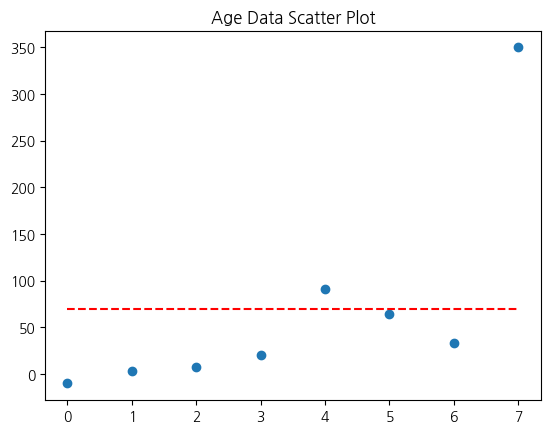

In [17]:
## - 현재 데이터 시각화
plt.scatter(ageSR.index, ageSR.values)
plt.title("Age Data Scatter Plot")
plt.hlines(ageSR.mean(), xmin=0, xmax=7, colors='r', linestyles='dashed', label='Mean') 

plt.show()

In [25]:
## ------------------------------------------------------------------
## 절삭 평균 : 양 극단값 제거한 데이터의 합계/개수
## ------------------------------------------------------------------
## - Pandas
print(f"mean => { ageSR[1:-1].mean() } ")

## - Numpy
print(f"mean => { np.mean(ageSR[1:-1]) } ")

## - Python : 집계 함수
print(f"mean => { sum(ageSR[1:-1]) / len(ageSR[1:-1]) } ")

## - Scipy - stats
print(f"mean => { stats.trim_mean(ageSR, 0.2)} ")

mean => 36.666666666666664 
mean => 36.666666666666664 
mean => 36.666666666666664 
mean => 36.666666666666664 


In [ ]:
## ------------------------------------------------------------------
## 가중 평균 : 가중치 * 데이터 합계/개수
## ------------------------------------------------------------------
## - Pandas
wSR = pd.Series([0.1, 1, 1, 1, 1, 1, 1, 0.1])
print(f"weighted_mean => {(wSR * ageSR).sum() / wSR.sum()})")

## - Numpy
print(f"weighted_mean => { np.average(ageSR.values, weights=wSR) } ")

weighted_mean => 40.96774193548387)
weighted_mean => 40.96774193548387 


[3] 위치 추정/대표값 찾기 - 중간값/중앙값 <hr>

In [35]:
#pip install wquantiles
import wquantiles as wq

In [36]:
## ------------------------------------------------------------------
## 중간값/중앙값 : 오름차순 정렬 후 가운데 있는 값
## ------------------------------------------------------------------
## - Pandas
print(f"mean => { ageSR.median() } ")

## - Numpy
print(f"mean => { np.median(ageSR) } ")

mean => 27.0 
mean => 27.0 


In [44]:
## ------------------------------------------------------------------
## 가중 중앙값 : 가중치 곱한 후 정렬
## ------------------------------------------------------------------

## wquantailes
m1 = wq.median(ageSR, wSR)          ## median(데이터, 가중치)
m2 = wq.quantile(ageSR, wSR, 0.5)     ## median(데이터, 가중치, 비율)

m1, m2

(np.float64(27.0), np.float64(27.0))

[3] 위치추정/대표값 찾기 - 최빈값 <hr>

In [46]:
## ------------------------------------------------------------------
## 최빈값 : 가장 많이 존재하는 값
## ------------------------------------------------------------------
## - Pandas
print(f"mode => { ageSR.mode() } ")

mode => 0    -10
1      3
2      8
3     21
4     33
5     64
6     91
7    350
dtype: int64 
